In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read in CO data
CO_2015 = pd.read_csv('CO.csv')
CO_2016 = pd.read_csv('CO2016.csv')
CO_2017 = pd.read_csv('CO2017.csv')
CO_2018 = pd.read_csv('CO2018.csv')
CO_2019 = pd.read_csv('CO2019.csv')
CO_2020 = pd.read_csv('CO2020.csv')

In [3]:
#append CO data frames 
CO_df = CO_2015.append([CO_2016, CO_2017, CO_2018, CO_2019, CO_2020])

In [4]:
#preview CO data
CO_df.head()

,Date,Source,Site ID,POC,Daily Max 8-hour CO Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2015,AQS,110010023,1,0.8,ppm,9,Verizon,19,79.0,42101,Carbon monoxide,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.903889,-77.046389
1,01/02/2015,AQS,110010023,1,1.1,ppm,13,Verizon,24,100.0,42101,Carbon monoxide,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.903889,-77.046389
2,01/03/2015,AQS,110010023,1,1.5,ppm,17,Verizon,24,100.0,42101,Carbon monoxide,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.903889,-77.046389
3,01/04/2015,AQS,110010023,1,0.9,ppm,10,Verizon,24,100.0,42101,Carbon monoxide,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.903889,-77.046389
4,01/05/2015,AQS,110010023,1,0.6,ppm,7,Verizon,18,75.0,42101,Carbon monoxide,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.903889,-77.046389


In [5]:
#we want monthly data, but we have daily
#we will use a pivot table to average the daily values to monthly

#first get a column that has date in the format yyyy-mm-01
CO_df['Year'] = pd.DatetimeIndex(CO_df['Date']).year
CO_df['Month'] = pd.DatetimeIndex(CO_df['Date']).month
CO_df['DATE'] = pd.to_datetime(CO_df[['Year', 'Month']].assign(DAY=1))
CO_df.head()

,Date,Source,Site ID,POC,Daily Max 8-hour CO Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,Year,Month,DATE
0,01/01/2015,AQS,110010023,1,0.8,ppm,9,Verizon,19,79.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.903889,-77.046389,2015,1,2015-01-01
1,01/02/2015,AQS,110010023,1,1.1,ppm,13,Verizon,24,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.903889,-77.046389,2015,1,2015-01-01
2,01/03/2015,AQS,110010023,1,1.5,ppm,17,Verizon,24,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.903889,-77.046389,2015,1,2015-01-01
3,01/04/2015,AQS,110010023,1,0.9,ppm,10,Verizon,24,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.903889,-77.046389,2015,1,2015-01-01
4,01/05/2015,AQS,110010023,1,0.6,ppm,7,Verizon,18,75.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.903889,-77.046389,2015,1,2015-01-01


In [6]:
#make pivot table
CO_monthly_df = pd.pivot_table(CO_df, #data
                               values = 'Daily Max 8-hour CO Concentration', #the values we want to average
                               index = 'DATE', #rows
                               aggfunc = np.mean) #how we want data aggregated 

#rename column to include units
CO_monthly_df = CO_monthly_df.rename(columns={'Daily Max 8-hour CO Concentration':'Daily Max 8-hour CO Concentration ppm'})

In [7]:
CO_monthly_df.head()

,Daily Max 8-hour CO Concentration ppm
DATE,
2015-01-01,0.740323
2015-02-01,0.630769
2015-03-01,0.651613
2015-04-01,0.423333
2015-05-01,0.333871


In [8]:
#follow the same steps for the remaining pollution data
#NO2, ozone, PM10, PM2.5, and SO2

#read in NO2 data
NO2_2015 = pd.read_csv('NO2.csv')
NO2_2016 = pd.read_csv('NO22016.csv')
NO2_2017 = pd.read_csv('NO22017.csv')
NO2_2018 = pd.read_csv('NO22018.csv')
NO2_2019 = pd.read_csv('NO22019.csv')
NO2_2020 = pd.read_csv('NO22020.csv')

In [9]:
#append NO2 data frames 
NO2_df = NO2_2015.append([NO2_2016, NO2_2017, NO2_2018, NO2_2019, NO2_2020])

In [10]:
#preview NO2 data
NO2_df.head()

,Date,Source,Site ID,POC,Daily Max 1-hour NO2 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2015,AQS,110010043,1,38.7,ppb,36,MCMILLAN NCore-PAMS,24,100.0,42602,Nitrogen dioxide (NO2),47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
1,01/02/2015,AQS,110010043,1,42.3,ppb,40,MCMILLAN NCore-PAMS,24,100.0,42602,Nitrogen dioxide (NO2),47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
2,01/03/2015,AQS,110010043,1,44.2,ppb,42,MCMILLAN NCore-PAMS,24,100.0,42602,Nitrogen dioxide (NO2),47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
3,01/04/2015,AQS,110010043,1,25.0,ppb,24,MCMILLAN NCore-PAMS,24,100.0,42602,Nitrogen dioxide (NO2),47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
4,01/05/2015,AQS,110010043,1,9.5,ppb,8,MCMILLAN NCore-PAMS,24,100.0,42602,Nitrogen dioxide (NO2),47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178


In [11]:
NO2_df['Year'] = pd.DatetimeIndex(NO2_df['Date']).year
NO2_df['Month'] = pd.DatetimeIndex(NO2_df['Date']).month
NO2_df['DATE'] = pd.to_datetime(NO2_df[['Year', 'Month']].assign(DAY=1))
NO2_df.head()

,Date,Source,Site ID,POC,Daily Max 1-hour NO2 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,Year,Month,DATE
0,01/01/2015,AQS,110010043,1,38.7,ppb,36,MCMILLAN NCore-PAMS,24,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
1,01/02/2015,AQS,110010043,1,42.3,ppb,40,MCMILLAN NCore-PAMS,24,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
2,01/03/2015,AQS,110010043,1,44.2,ppb,42,MCMILLAN NCore-PAMS,24,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
3,01/04/2015,AQS,110010043,1,25.0,ppb,24,MCMILLAN NCore-PAMS,24,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
4,01/05/2015,AQS,110010043,1,9.5,ppb,8,MCMILLAN NCore-PAMS,24,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01


In [12]:
NO2_monthly_df = pd.pivot_table(NO2_df, #data
                                values = 'Daily Max 1-hour NO2 Concentration', #the values we want to average
                                index = 'DATE', #rows
                                aggfunc = np.mean) #how we want data aggregated 

#rename column to include units
NO2_monthly_df = NO2_monthly_df.rename(columns={'Daily Max 1-hour NO2 Concentration':'Daily Max 1-hour NO2 Concentration ppb'})

In [13]:
NO2_monthly_df.head()

,Daily Max 1-hour NO2 Concentration ppb
DATE,
2015-01-01,32.500000
2015-02-01,36.846429
2015-03-01,33.450000
2015-04-01,25.636667
2015-05-01,15.172581


In [14]:
#read in ozone data
ozone_2015 = pd.read_csv('ozone.csv')
ozone_2016 = pd.read_csv('ozone2016.csv')
ozone_2017 = pd.read_csv('ozone2017.csv')
ozone_2018 = pd.read_csv('ozone2018.csv')
ozone_2019 = pd.read_csv('ozone2019.csv')
ozone_2020 = pd.read_csv('ozone2020.csv')

ozone_df = ozone_2015.append([ozone_2016, ozone_2017, ozone_2018, ozone_2019, ozone_2020])

ozone_df.head()

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2015,AQS,110010043,1,0.030,ppm,28,MCMILLAN NCore-PAMS,17,100.0,44201,Ozone,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
1,01/02/2015,AQS,110010043,1,0.022,ppm,20,MCMILLAN NCore-PAMS,17,100.0,44201,Ozone,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
2,01/03/2015,AQS,110010043,1,0.005,ppm,5,MCMILLAN NCore-PAMS,17,100.0,44201,Ozone,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
3,01/04/2015,AQS,110010043,1,0.024,ppm,22,MCMILLAN NCore-PAMS,17,100.0,44201,Ozone,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
4,01/05/2015,AQS,110010043,1,0.032,ppm,30,MCMILLAN NCore-PAMS,17,100.0,44201,Ozone,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178


In [15]:
ozone_df['Year'] = pd.DatetimeIndex(ozone_df['Date']).year
ozone_df['Month'] = pd.DatetimeIndex(ozone_df['Date']).month
ozone_df['DATE'] = pd.to_datetime(ozone_df[['Year', 'Month']].assign(DAY=1))
ozone_df.head()

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,Year,Month,DATE
0,01/01/2015,AQS,110010043,1,0.030,ppm,28,MCMILLAN NCore-PAMS,17,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
1,01/02/2015,AQS,110010043,1,0.022,ppm,20,MCMILLAN NCore-PAMS,17,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
2,01/03/2015,AQS,110010043,1,0.005,ppm,5,MCMILLAN NCore-PAMS,17,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
3,01/04/2015,AQS,110010043,1,0.024,ppm,22,MCMILLAN NCore-PAMS,17,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
4,01/05/2015,AQS,110010043,1,0.032,ppm,30,MCMILLAN NCore-PAMS,17,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01


In [16]:
ozone_monthly_df = pd.pivot_table(ozone_df, #data
                                  values = 'Daily Max 8-hour Ozone Concentration', #the values we want to average
                                  index = 'DATE', #rows
                                  aggfunc = np.mean) #how we want data aggregated 

#rename column to include units
ozone_monthly_df = ozone_monthly_df.rename(columns={'Daily Max 8-hour Ozone Concentration':'Daily Max 8-hour Ozone Concentration ppm'})

ozone_monthly_df.head()

,Daily Max 8-hour Ozone Concentration ppm
DATE,
2015-01-01,0.024258
2015-02-01,0.030375
2015-03-01,0.036267
2015-04-01,0.044233
2015-05-01,0.048435


In [17]:
PM10_2015 = pd.read_csv('pm10.csv')
PM10_2016 = pd.read_csv('pm102016.csv')
PM10_2017 = pd.read_csv('pm102017.csv')
PM10_2018 = pd.read_csv('pm102018.csv')
PM10_2019 = pd.read_csv('pm102019.csv')
PM10_2020 = pd.read_csv('pm102020.csv')

PM10_df = PM10_2015.append([PM10_2016, PM10_2017, PM10_2018, PM10_2019, PM10_2020])

PM10_df.head()

,Date,Source,Site ID,POC,Daily Mean PM10 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2015,AQS,110010043,4,12,ug/m3 SC,11,MCMILLAN NCore-PAMS,1,100.0,81102,PM10 Total 0-10um STP,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
1,01/02/2015,AQS,110010043,4,16,ug/m3 SC,15,MCMILLAN NCore-PAMS,1,100.0,81102,PM10 Total 0-10um STP,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
2,01/03/2015,AQS,110010043,4,22,ug/m3 SC,20,MCMILLAN NCore-PAMS,1,100.0,81102,PM10 Total 0-10um STP,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
3,01/04/2015,AQS,110010043,4,5,ug/m3 SC,5,MCMILLAN NCore-PAMS,1,100.0,81102,PM10 Total 0-10um STP,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
4,01/05/2015,AQS,110010043,4,7,ug/m3 SC,6,MCMILLAN NCore-PAMS,1,100.0,81102,PM10 Total 0-10um STP,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178


In [18]:
PM10_df['Year'] = pd.DatetimeIndex(PM10_df['Date']).year
PM10_df['Month'] = pd.DatetimeIndex(PM10_df['Date']).month
PM10_df['DATE'] = pd.to_datetime(PM10_df[['Year', 'Month']].assign(DAY=1))
PM10_df.head()

,Date,Source,Site ID,POC,Daily Mean PM10 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,Year,Month,DATE
0,01/01/2015,AQS,110010043,4,12,ug/m3 SC,11,MCMILLAN NCore-PAMS,1,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
1,01/02/2015,AQS,110010043,4,16,ug/m3 SC,15,MCMILLAN NCore-PAMS,1,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
2,01/03/2015,AQS,110010043,4,22,ug/m3 SC,20,MCMILLAN NCore-PAMS,1,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
3,01/04/2015,AQS,110010043,4,5,ug/m3 SC,5,MCMILLAN NCore-PAMS,1,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
4,01/05/2015,AQS,110010043,4,7,ug/m3 SC,6,MCMILLAN NCore-PAMS,1,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01


In [19]:
PM10_monthly_df = pd.pivot_table(PM10_df, #data
                                 values = 'Daily Mean PM10 Concentration', #the values we want to average
                                 index = 'DATE', #rows
                                 aggfunc = np.mean) #how we want data aggregated 

#rename column to include units
PM10_monthly_df = PM10_monthly_df.rename(columns={'Daily Mean PM10 Concentration':'Daily Mean PM10 Concentration ug/m3 SC'})

PM10_monthly_df.head()

,Daily Mean PM10 Concentration ug/m3 SC
DATE,
2015-01-01,15.967742
2015-02-01,19.178571
2015-03-01,16.935484
2015-04-01,13.366667
2015-05-01,23.419355


In [20]:
PM2_5_2015 = pd.read_csv('pm2_5.csv')
PM2_5_2016 = pd.read_csv('pm2_52016.csv')
PM2_5_2017 = pd.read_csv('pm2_52017.csv')
PM2_5_2018 = pd.read_csv('pm2_52018.csv')
PM2_5_2019 = pd.read_csv('pm2_52019.csv')
PM2_5_2020 = pd.read_csv('pm2_52020.csv')

PM2_5_df = PM2_5_2015.append([PM2_5_2016, PM2_5_2017, PM2_5_2018, PM2_5_2019, PM2_5_2020])

PM2_5_df.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,Daily Mean PM10 Concentration
0,01/03/2015,AQS,110010042,1,18.0,ug/m3 LC,63,HAINS POINT PM-2.5 AND IMPROVE SITE ON ROOF OF...,1,100.0,...,Acceptable PM2.5 AQI & Speciation Mass,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.876255,-77.034059,NaN
1,01/06/2015,AQS,110010042,1,8.9,ug/m3 LC,37,HAINS POINT PM-2.5 AND IMPROVE SITE ON ROOF OF...,1,100.0,...,PM2.5 - Local Conditions,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.876255,-77.034059,NaN
2,01/09/2015,AQS,110010042,1,6.6,ug/m3 LC,28,HAINS POINT PM-2.5 AND IMPROVE SITE ON ROOF OF...,1,100.0,...,PM2.5 - Local Conditions,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.876255,-77.034059,NaN
3,01/12/2015,AQS,110010042,1,12.0,ug/m3 LC,50,HAINS POINT PM-2.5 AND IMPROVE SITE ON ROOF OF...,1,100.0,...,PM2.5 - Local Conditions,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.876255,-77.034059,NaN
4,01/15/2015,AQS,110010042,1,21.6,ug/m3 LC,71,HAINS POINT PM-2.5 AND IMPROVE SITE ON ROOF OF...,1,100.0,...,PM2.5 - Local Conditions,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.876255,-77.034059,NaN


In [21]:
PM2_5_df['Year'] = pd.DatetimeIndex(PM2_5_df['Date']).year
PM2_5_df['Month'] = pd.DatetimeIndex(PM2_5_df['Date']).month
PM2_5_df['DATE'] = pd.to_datetime(PM2_5_df[['Year', 'Month']].assign(DAY=1))
PM2_5_df.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,Daily Mean PM10 Concentration,Year,Month,DATE
0,01/03/2015,AQS,110010042,1,18.0,ug/m3 LC,63,HAINS POINT PM-2.5 AND IMPROVE SITE ON ROOF OF...,1,100.0,...,11,District Of Columbia,1,District of Columbia,38.876255,-77.034059,NaN,2015,1,2015-01-01
1,01/06/2015,AQS,110010042,1,8.9,ug/m3 LC,37,HAINS POINT PM-2.5 AND IMPROVE SITE ON ROOF OF...,1,100.0,...,11,District Of Columbia,1,District of Columbia,38.876255,-77.034059,NaN,2015,1,2015-01-01
2,01/09/2015,AQS,110010042,1,6.6,ug/m3 LC,28,HAINS POINT PM-2.5 AND IMPROVE SITE ON ROOF OF...,1,100.0,...,11,District Of Columbia,1,District of Columbia,38.876255,-77.034059,NaN,2015,1,2015-01-01
3,01/12/2015,AQS,110010042,1,12.0,ug/m3 LC,50,HAINS POINT PM-2.5 AND IMPROVE SITE ON ROOF OF...,1,100.0,...,11,District Of Columbia,1,District of Columbia,38.876255,-77.034059,NaN,2015,1,2015-01-01
4,01/15/2015,AQS,110010042,1,21.6,ug/m3 LC,71,HAINS POINT PM-2.5 AND IMPROVE SITE ON ROOF OF...,1,100.0,...,11,District Of Columbia,1,District of Columbia,38.876255,-77.034059,NaN,2015,1,2015-01-01


In [22]:
PM2_5_monthly_df = pd.pivot_table(PM2_5_df, #data
                                  values = 'Daily Mean PM2.5 Concentration', #the values we want to average
                                  index = 'DATE', #rows
                                  aggfunc = np.mean) #how we want data aggregated 

#rename column to include units
PM2_5_monthly_df = PM2_5_monthly_df.rename(columns={'Daily Mean PM2.5 Concentration':'Daily Mean PM2.5 Concentration ug/m3 LC'})

PM2_5_monthly_df.tail()

,Daily Mean PM2.5 Concentration ug/m3 LC
DATE,
2020-07-01,10.084967
2020-08-01,7.747712
2020-09-01,6.278082
2020-10-01,6.070270
2020-11-01,7.983333


In [23]:
SO2_2015 = pd.read_csv('SO2.csv')
SO2_2016 = pd.read_csv('SO22016.csv')
SO2_2017 = pd.read_csv('SO22017.csv')
SO2_2018 = pd.read_csv('SO22018.csv')
SO2_2019 = pd.read_csv('SO22019.csv')
SO2_2020 = pd.read_csv('SO22020.csv')

SO2_df = SO2_2015.append([SO2_2016, SO2_2017, SO2_2018, SO2_2019, SO2_2020])

SO2_df.head()

,Date,Source,Site ID,POC,Daily Max 1-hour SO2 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2015,AQS,110010043,2,2.6,ppb,3,MCMILLAN NCore-PAMS,24,100.0,42401,Sulfur dioxide,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
1,01/02/2015,AQS,110010043,2,4.7,ppb,6,MCMILLAN NCore-PAMS,24,100.0,42401,Sulfur dioxide,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
2,01/03/2015,AQS,110010043,2,4.5,ppb,6,MCMILLAN NCore-PAMS,24,100.0,42401,Sulfur dioxide,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
3,01/04/2015,AQS,110010043,2,1.3,ppb,1,MCMILLAN NCore-PAMS,24,100.0,42401,Sulfur dioxide,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
4,01/05/2015,AQS,110010043,2,6.1,ppb,9,MCMILLAN NCore-PAMS,23,96.0,42401,Sulfur dioxide,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178


In [24]:
SO2_df['Year'] = pd.DatetimeIndex(SO2_df['Date']).year
SO2_df['Month'] = pd.DatetimeIndex(SO2_df['Date']).month
SO2_df['DATE'] = pd.to_datetime(SO2_df[['Year', 'Month']].assign(DAY=1))
SO2_df.head()

,Date,Source,Site ID,POC,Daily Max 1-hour SO2 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,Year,Month,DATE
0,01/01/2015,AQS,110010043,2,2.6,ppb,3,MCMILLAN NCore-PAMS,24,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
1,01/02/2015,AQS,110010043,2,4.7,ppb,6,MCMILLAN NCore-PAMS,24,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
2,01/03/2015,AQS,110010043,2,4.5,ppb,6,MCMILLAN NCore-PAMS,24,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
3,01/04/2015,AQS,110010043,2,1.3,ppb,1,MCMILLAN NCore-PAMS,24,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
4,01/05/2015,AQS,110010043,2,6.1,ppb,9,MCMILLAN NCore-PAMS,23,96.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01


In [25]:
SO2_monthly_df = pd.pivot_table(SO2_df, #data
                                values = 'Daily Max 1-hour SO2 Concentration', #the values we want to average
                                index = 'DATE', #rows
                                aggfunc = np.mean) #how we want data aggregated 

#rename column to include units
SO2_monthly_df = SO2_monthly_df.rename(columns={'Daily Max 1-hour SO2 Concentration':'Daily Max 1-hour SO2 Concentration ppb'})

SO2_monthly_df.tail()

,Daily Max 1-hour SO2 Concentration ppb
DATE,
2020-02-01,1.382759
2020-03-01,1.316129
2020-04-01,1.253333
2020-05-01,1.254839
2020-06-01,1.526667


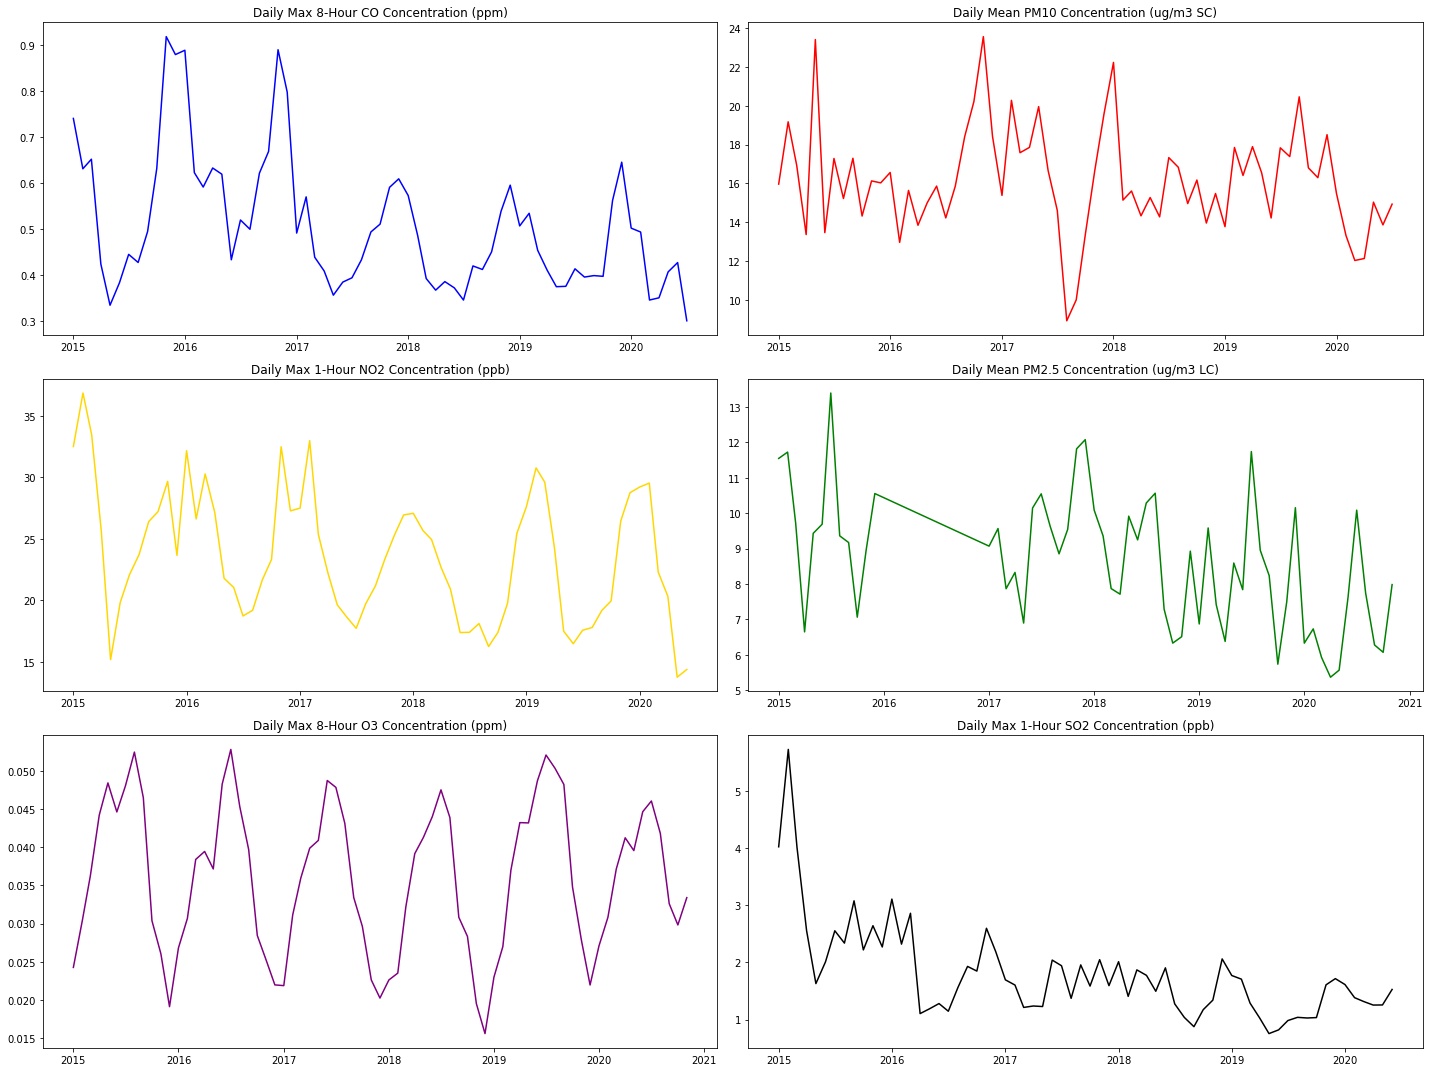

In [135]:
#Sources for Assistance: 
#https://stackoverflow.com/questions/31726643/how-do-i-get-multiple-subplots-in-matplotlib
#https://stackoverflow.com/questions/25239933/how-to-add-title-to-subplots-in-matplotlib
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
axes[0,0].plot(CO_monthly_df, color="blue")
axes[0,0].title.set_text("Daily Max 8-Hour CO Concentration (ppm)")
axes[1,0].plot(NO2_monthly_df, color="gold")
axes[1,0].title.set_text("Daily Max 1-Hour NO2 Concentration (ppb)")
axes[2,0].plot(ozone_monthly_df, color="purple")
axes[2,0].title.set_text("Daily Max 8-Hour O3 Concentration (ppm)")
axes[0,1].plot(PM10_monthly_df, color="red")
axes[0,1].title.set_text("Daily Mean PM10 Concentration (ug/m3 SC)")
axes[1,1].plot(PM2_5_monthly_df, color= "green")
axes[1,1].title.set_text("Daily Mean PM2.5 Concentration (ug/m3 LC)")
axes[2,1].plot(SO2_monthly_df, color="black")
axes[2,1].title.set_text("Daily Max 1-Hour SO2 Concentration (ppb)")
fig.tight_layout()

# CO Plot
#no obvious increasing or decreasing trend
#may be some seasonality
#lower peaks after 2017

# NO2 Plot
#no obvious increasing or decreasing trend
#lowest value for this timeframe occurs in 2020
#some seasonality

# O3 Plot
#no obvious increasing or decreasing trent
#seasonality
#2020 seems to deviate from normal trend of previous 5 years

# PM10 Plot
#no obvious trend
#no obvious seasonality
#outliar in mid 2017
#2020 values look slightly lower than previous 5 years (with the exception of the outliar)

# PM2.5 Plot
#deacreasing trend
#some data anomolies in 2016-2017 timeframe
#lowest value occurs in 2020

# SO2 Plot
#outlier in early 2015
#potential data anomolies at the end of data

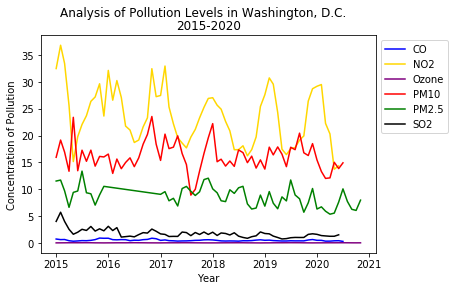

In [134]:
#Sources for assistance: 
#https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
new_list = ['CO', 'NO2', 'Ozone', 'PM10', 'PM2.5','SO2']
plt.plot(CO_monthly_df, color= 'blue')
plt.plot(NO2_monthly_df, color = 'gold')
plt.plot(ozone_monthly_df, color= 'purple')
plt.plot(PM10_monthly_df, color= 'red')
plt.plot(PM2_5_monthly_df, color= 'green')
plt.plot(SO2_monthly_df, color = 'black')
plt.xlabel("Year")
plt.ylabel('Concentration of Pollution')
plt.suptitle('Analysis of Pollution Levels in Washington, D.C.')
plt.title('2015-2020')
plt.legend(new_list, loc="upper left", bbox_to_anchor=(1,1));


In [153]:
newbie_list = [CO_monthly_df.describe(), NO2_monthly_df.describe(), ozone_monthly_df.describe(),PM10_monthly_df.describe(), PM2_5_monthly_df.describe(), SO2_monthly_df.describe()]
ultimate_x= pd.concat(newbie_list, axis= 1, join="outer")
ultimate_x

,Daily Max 8-hour CO Concentration ppm,Daily Max 1-hour NO2 Concentration ppb,Daily Max 8-hour Ozone Concentration ppm,Daily Mean PM10 Concentration ug/m3 SC,Daily Mean PM2.5 Concentration ug/m3 LC,Daily Max 1-hour SO2 Concentration ppb
count,67.000000,66.000000,71.000000,67.000000,59.000000,66.000000
mean,0.507999,23.583052,0.035923,16.159875,8.650625,1.803912
std,0.145189,5.324437,0.009837,2.712904,1.853748,0.839687
min,0.300000,13.749587,0.015585,8.923077,5.368000,0.753333
25%,0.397554,19.295600,0.028067,14.327957,7.175624,1.253710
50%,0.485714,23.319758,0.037011,15.967742,8.927407,1.610298
75%,0.593086,27.187463,0.044128,17.486652,9.816055,2.046518
max,0.918391,36.846429,0.052828,23.571429,13.392913,5.732000


CO, NO2, ozone, and PM10 data seem to be the most complete based on the graphs. 

I believe we should create models for CO and PM10 since these pollutants are easy to understand in terms of their causes, contributions to air pollution, and effects on health.

CO:

From NASA (https://climate.nasa.gov/news/2291/fourteen-years-of-carbon-monoxide-from-mopitt/#:~:text=and%20carbon%20dioxide.-,Though%20carbon%20monoxide%20does%20not%20cause%20climate%20change%20directly%2C%20its,gas%20and%20wood%E2%80%94are%20burned.):

"Though carbon monoxide does not cause climate change directly, its presence affects the abundance of greenhouse gases such as methane and carbon dioxide."

PM10:

From EPA (https://www.epa.gov/sites/production/files/2014-05/documents/huff-particle.pdf):

-Exposure to particle pollution is a
public health hazard

-When inhaled, particle pollution can
travel deep into the lungs and cause or
aggravate heart and lung diseases

• Primary sources:

– Incomplete combustion

– Automobile emissions

– Dust

– Cooking

• Secondary sources:

– Chemical reactions in the atmosphere

In [38]:
#read in gasoline sales data

gasoline_sales_df = pd.read_csv('District_of_Columbia_Total_Gasoline_All_Sales_per_Deliveries_by_Prime_Supplier.csv', skiprows=4)
gasoline_sales_df.head()

,Month,District of Columbia Total Gasoline All Sales/Deliveries by Prime Supplier Thousand Gallons per Day
0,Aug 2020,172.1
1,Jul 2020,166.3
2,Jun 2020,150.8
3,May 2020,117.9
4,Apr 2020,94.1


In [39]:
#rename column to shorter name
gasoline_sales_df = gasoline_sales_df.rename(columns={'District of Columbia Total Gasoline All Sales/Deliveries by Prime Supplier Thousand Gallons per Day':'Prime Supplier Sales of Gasoline Mgal/d'})

#change format of months in Month column to match our other data
gasoline_sales_df['DATE'] = pd.to_datetime(gasoline_sales_df['Month'], infer_datetime_format=True)

gasoline_sales_df.head()

,Month,Prime Supplier Sales of Gasoline Mgal/d,DATE
0,Aug 2020,172.1,2020-08-01
1,Jul 2020,166.3,2020-07-01
2,Jun 2020,150.8,2020-06-01
3,May 2020,117.9,2020-05-01
4,Apr 2020,94.1,2020-04-01


In [40]:
#merge dataframes together
pollution_df = gasoline_sales_df[['DATE', 'Prime Supplier Sales of Gasoline Mgal/d']].merge(CO_monthly_df, on='DATE')
pollution_df = pollution_df.merge(PM10_monthly_df, on='DATE')

In [41]:
pollution_df

,DATE,Prime Supplier Sales of Gasoline Mgal/d,Daily Max 8-hour CO Concentration ppm,Daily Mean PM10 Concentration ug/m3 SC
0,2020-07-01,166.3,0.300000,14.935484
1,2020-06-01,150.8,0.426667,13.866667
2,2020-05-01,117.9,0.406452,15.038462
3,2020-04-01,94.1,0.350000,12.133333
4,2020-03-01,152.6,0.345161,12.032258
...,...,...,...,...
62,2015-05-01,203.6,0.333871,23.419355
63,2015-04-01,191.6,0.423333,13.366667
64,2015-03-01,188.3,0.651613,16.935484
65,2015-02-01,184.5,0.630769,19.178571
